## Citi Bike February 2020 Trip Data

<b><i>Dataset exploration, cleaning & feature engineering

Data source: https://www.nyc.gov/html/dot/html/bicyclists/bikestats.shtml#tripdata <br>
Notebook by Alan Grunberg, https://github.com/alandavidgrunberg

<b>loading libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from geopy import distance

<b>loading original data from CSV into Pandas DataFrame

In [2]:
df_orig = pd.read_csv('data/feb_2020_original.csv')
df = df_orig.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146830 entries, 0 to 1146829
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             1146830 non-null  int64  
 1   starttime                1146830 non-null  object 
 2   stoptime                 1146830 non-null  object 
 3   start station id         1146830 non-null  int64  
 4   start station name       1146830 non-null  object 
 5   start station latitude   1146830 non-null  float64
 6   start station longitude  1146830 non-null  float64
 7   end station id           1146830 non-null  int64  
 8   end station name         1146830 non-null  object 
 9   end station latitude     1146830 non-null  float64
 10  end station longitude    1146830 non-null  float64
 11  bikeid                   1146830 non-null  int64  
 12  usertype                 1146830 non-null  object 
 13  birth year               1146830 non-null 

In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1404,2020-02-01 00:00:05.9460,2020-02-01 00:23:30.7240,316,Fulton St & William St,40.709560,-74.006536,481,S 3 St & Bedford Ave,40.712605,-73.962644,28874,Customer,1995,1
1,1301,2020-02-01 00:00:06.2230,2020-02-01 00:21:48.0580,237,E 11 St & 2 Ave,40.730473,-73.986724,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,32588,Subscriber,1991,1
2,474,2020-02-01 00:00:15.7210,2020-02-01 00:08:10.3440,528,2 Ave & E 31 St,40.742909,-73.977061,3785,W 42 St & 6 Ave,40.754920,-73.984550,41013,Subscriber,1994,1
3,487,2020-02-01 00:00:21.0520,2020-02-01 00:08:28.7520,380,W 4 St & 7 Ave S,40.734011,-74.002939,3263,Cooper Square & Astor Pl,40.729515,-73.990753,27581,Subscriber,1973,2
4,619,2020-02-01 00:00:27.4000,2020-02-01 00:10:47.0640,472,E 32 St & Park Ave,40.745712,-73.981948,237,E 11 St & 2 Ave,40.730473,-73.986724,29062,Subscriber,1994,1


<b>some rows have extremely unlikely birth years

In [4]:
df['birth year'].value_counts().sort_index()

1885       7
1886      14
1887      29
1888      86
1889      13
        ... 
2000    7999
2001    3455
2002    1917
2003    1108
2004       9
Name: birth year, Length: 98, dtype: int64

<b>removing rows with extremely unlikely birth years (riders above 100 years old)

In [5]:
df = df[df['birth year'] >= 1920]
df['birth year'].value_counts().sort_index()

1921      21
1923       3
1924      37
1927       1
1929       8
        ... 
2000    7999
2001    3455
2002    1917
2003    1108
2004       9
Name: birth year, Length: 80, dtype: int64

<b>changing gender values from integer to label (1 = Male, 2 = Female)</b><br>
<i>*only choices provided by Citi Bike

In [6]:
df.loc[df['gender'] == 1,'gender'] = 'Male'
df.loc[df['gender'] == 2,'gender'] = 'Female'
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1404,2020-02-01 00:00:05.9460,2020-02-01 00:23:30.7240,316,Fulton St & William St,40.709560,-74.006536,481,S 3 St & Bedford Ave,40.712605,-73.962644,28874,Customer,1995,Male
1,1301,2020-02-01 00:00:06.2230,2020-02-01 00:21:48.0580,237,E 11 St & 2 Ave,40.730473,-73.986724,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,32588,Subscriber,1991,Male
2,474,2020-02-01 00:00:15.7210,2020-02-01 00:08:10.3440,528,2 Ave & E 31 St,40.742909,-73.977061,3785,W 42 St & 6 Ave,40.754920,-73.984550,41013,Subscriber,1994,Male
3,487,2020-02-01 00:00:21.0520,2020-02-01 00:08:28.7520,380,W 4 St & 7 Ave S,40.734011,-74.002939,3263,Cooper Square & Astor Pl,40.729515,-73.990753,27581,Subscriber,1973,Female
4,619,2020-02-01 00:00:27.4000,2020-02-01 00:10:47.0640,472,E 32 St & Park Ave,40.745712,-73.981948,237,E 11 St & 2 Ave,40.730473,-73.986724,29062,Subscriber,1994,Male


<b>some rows have rider's gender unknown (value 0)

In [7]:
df['gender'].value_counts()

Male      832803
Female    257008
0          56553
Name: gender, dtype: int64

<b>removing rows with unknown gender

In [8]:
df = df[df['gender'] != 0]

<b>converting trip durations from seconds to minutes

In [9]:
df['tripduration'] = df['tripduration']/60
df['tripduration'] = df['tripduration'].round()
df['tripduration'] = df['tripduration'].astype(int)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,23,2020-02-01 00:00:05.9460,2020-02-01 00:23:30.7240,316,Fulton St & William St,40.709560,-74.006536,481,S 3 St & Bedford Ave,40.712605,-73.962644,28874,Customer,1995,Male
1,22,2020-02-01 00:00:06.2230,2020-02-01 00:21:48.0580,237,E 11 St & 2 Ave,40.730473,-73.986724,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,32588,Subscriber,1991,Male
2,8,2020-02-01 00:00:15.7210,2020-02-01 00:08:10.3440,528,2 Ave & E 31 St,40.742909,-73.977061,3785,W 42 St & 6 Ave,40.754920,-73.984550,41013,Subscriber,1994,Male
3,8,2020-02-01 00:00:21.0520,2020-02-01 00:08:28.7520,380,W 4 St & 7 Ave S,40.734011,-74.002939,3263,Cooper Square & Astor Pl,40.729515,-73.990753,27581,Subscriber,1973,Female
4,10,2020-02-01 00:00:27.4000,2020-02-01 00:10:47.0640,472,E 32 St & Park Ave,40.745712,-73.981948,237,E 11 St & 2 Ave,40.730473,-73.986724,29062,Subscriber,1994,Male


<b>some rows have extremely unlikely trip durations (up to 921 hours)

In [10]:
df['tripduration'].value_counts().sort_index()

1         8319
2        43213
3        69860
4        88359
5        90042
         ...  
23008        1
26753        1
27676        1
45108        1
55310        1
Name: tripduration, Length: 797, dtype: int64

In [11]:
55310/60

921.8333333333334

<b>removing rows with trip durations above 24 hours

In [12]:
df = df[df['tripduration'] <= 60*24]

<b>extreme outliers even when trips longer than 24 hours removed 

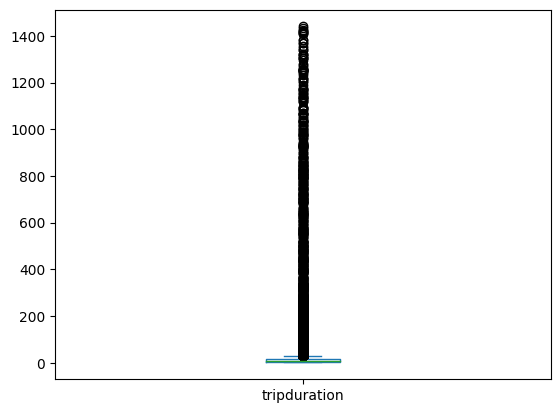

In [13]:
df['tripduration'].plot.box()
plt.show()

<b>removing rows with trip durations above 2 hours</b><br>
<i>*roughly the time it takes to bike between the two furthest apart Citi Bike stations

In [14]:
df = df[df['tripduration'] <= 60*2]

<b>still some outliers but more reasonable

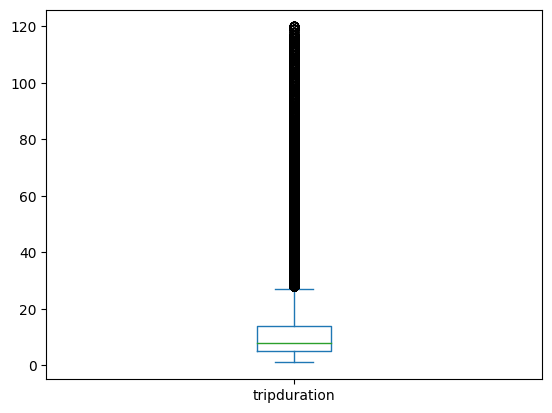

In [15]:
df['tripduration'].plot.box()
plt.show()

<b>strange error, some stations have single record with station coordinates slightly off and lower precision</b><br>
<i>*this can throw off mapping the stations later on

In [16]:
df[df['start station name'] == 'W 63 St & Broadway']['start station latitude'].value_counts()

40.771639    2387
40.773000       1
Name: start station latitude, dtype: int64

In [17]:
df[df['start station name'] == 'E 72 St & York Ave']['start station latitude'].value_counts()

40.766638    2015
40.767000       1
Name: start station latitude, dtype: int64

In [18]:
df[df['start station name'] == 'E 10 St & 5 Ave']['start station latitude'].value_counts()

40.73332    2365
40.73400       1
Name: start station latitude, dtype: int64

<b> fixing off records to show correct station coordinates

In [19]:
for station in df['start station name'].unique():
    
    median_lat = df[df['start station name'] == station]['start station latitude'].median()
    median_lon = df[df['start station name'] == station]['start station longitude'].median()
    
    df.loc[df['start station name'] == station, 'start station latitude'] = median_lat
    df.loc[df['start station name'] == station, 'start station longitude'] = median_lon

<b>creating new distance feature by measuring between start & end station coordinates for each ride</b><br>
<i>*straight line distance, underestimates actual travel distance, but still useful

In [20]:
df['start cords'] = list(zip(df['start station latitude'], df['start station longitude']))
df['end cords'] = list(zip(df['end station latitude'], df['end station longitude']))
df['distance'] = df.apply(lambda row: distance.distance(row['start cords'], row['end cords']).miles, axis=1)
df['distance'] = df['distance'].round(2)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start cords,end cords,distance
0,23,2020-02-01 00:00:05.9460,2020-02-01 00:23:30.7240,316,Fulton St & William St,40.709560,-74.006536,481,S 3 St & Bedford Ave,40.712605,-73.962644,28874,Customer,1995,Male,"(40.70955958, -74.00653609)","(40.71260486, -73.96264403)",2.31
1,22,2020-02-01 00:00:06.2230,2020-02-01 00:21:48.0580,237,E 11 St & 2 Ave,40.730473,-73.986724,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,32588,Subscriber,1991,Male,"(40.73047309, -73.98672378)","(40.71534825, -73.96024116)",1.74
2,8,2020-02-01 00:00:15.7210,2020-02-01 00:08:10.3440,528,2 Ave & E 31 St,40.742909,-73.977061,3785,W 42 St & 6 Ave,40.754920,-73.984550,41013,Subscriber,1994,Male,"(40.74290902, -73.97706058)","(40.75492, -73.98455)",0.92
3,8,2020-02-01 00:00:21.0520,2020-02-01 00:08:28.7520,380,W 4 St & 7 Ave S,40.734011,-74.002939,3263,Cooper Square & Astor Pl,40.729515,-73.990753,27581,Subscriber,1973,Female,"(40.73401143, -74.00293877)","(40.72951496224949, -73.99075269699097)",0.71
4,10,2020-02-01 00:00:27.4000,2020-02-01 00:10:47.0640,472,E 32 St & Park Ave,40.745712,-73.981948,237,E 11 St & 2 Ave,40.730473,-73.986724,29062,Subscriber,1994,Male,"(40.7457121, -73.98194829)","(40.73047309, -73.98672378)",1.08


<b>some rows have trip distances of 0</b><br>
<i>*meaning ride started and ended at same station

In [21]:
df['distance'].value_counts().sort_index()

0.00    15699
0.02      102
0.05      224
0.06      126
0.07      260
        ...  
8.33        1
8.47        2
8.58        1
8.61        1
8.74        1
Name: distance, Length: 741, dtype: int64

<b>removing rows with 0 distance trips</b><br>
<i>*interesting but <1% of trips & out of scope for this project

In [22]:
df = df[df['distance'] != 0]
df = df.reset_index(drop=True)

<b>outputting prepared dataset to CSV

In [23]:
#df.to_csv('data/feb_2020_prepared.csv')

In [24]:
df['usertype'].value_counts()

Subscriber    1022295
Customer        50537
Name: usertype, dtype: int64